In [1]:
import pandas as pd
import numpy as np
import csv
import math
import seaborn as sns 
import matplotlib.pyplot as plt

TITANIC DATASET ASSIGMENT

Author: Eduardo Cort Pons

Part I.

a) Read the dataset correctly using pandas, using an appropriate column as index

In [2]:
titanic_df = pd.read_csv(
        "train.csv",
        index_col="PassengerId"
)

titanic_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


------------------------------------------------------------------------------------------

Now, im gonna do some consulting operations, to be able to check my future results

In [3]:
titanic_df.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [4]:
total_Rows = titanic_df[['Survived']].count().values[0]
total_Rows

891

In [5]:
titanic_df.Survived.unique()

array([0, 1], dtype=int64)

In [6]:
titanic_df.Sex.unique()

array(['male', 'female'], dtype=object)

In [7]:
Survived_0 = titanic_df[titanic_df.Survived == 0].count().values[0]
Survived_0

549

In [8]:
Survived_1 = titanic_df[titanic_df.Survived == 1].count().values[0]
Survived_1

342

In [9]:
Number_Males = titanic_df[titanic_df.Sex == 'male'].count().values[0]
Number_Males

577

In [10]:
Number_Females = titanic_df[titanic_df.Sex == 'female'].count().values[0]
Number_Females

314

In [11]:
titanic_df.groupby("Survived")["Sex"].count()

Survived
0    549
1    342
Name: Sex, dtype: int64

In [12]:
titanic_df.groupby("Sex")["Survived"].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

All of the above code was done to check that:
    
   -There are no strange numbers in columns Survived and Sex
   
   -The numbers that I got (and that I am going to get) are correct 
       
   -Future operations    


--------------------------------------------------------------------------------------------------

Part I

d) Display in a 2 x 2 DataFrame the probability of being male/female and surviving/not surviving

In [13]:
Survived_Sex = pd.crosstab(titanic_df.Sex, titanic_df.Survived)
Survived_Sex

Survived,0,1
Sex,,
female,81,233
male,468,109


In [14]:
Survived_Sex_split = Survived_Sex.copy()

In [15]:
Survived_Sex_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, female to male
Data columns (total 2 columns):
0    2 non-null int64
1    2 non-null int64
dtypes: int64(2)
memory usage: 48.0+ bytes


In [16]:
Survived_Sex_split = Survived_Sex_split.astype(float)

In [17]:
for i in range(0,2):
    Survived_Sex_split.at['female', i] = round((Survived_Sex_split.at['female', i]/total_Rows)*100,2)
    Survived_Sex_split.at['male', i] = round((Survived_Sex_split.at['male', i]/total_Rows)*100,2)

In [18]:
Survived_Sex_split

Survived,0,1
Sex,,
female,9.09,26.15
male,52.53,12.23


------------------------------------------------------------------------------------------------

Part I

b) Compute the percentage of survivors out of total number of passengers and the percentage of men and women out of total number of passengers

In [19]:
Percentage_Survivors = round((Survived_1 * 100)/ total_Rows,2)
Percentage_Survivors

38.38

In [20]:
print ("The percentage of survivors out of total number of passengers is " + str(Percentage_Survivors) + " %")

The percentage of survivors out of total number of passengers is 38.38 %


In [21]:
Percentage_Males = round((Number_Males * 100)/ total_Rows,2)
Percentage_Males

64.76

In [22]:
Percentage_Females = round((Number_Females * 100)/ total_Rows,2)
Percentage_Females

35.24

In [23]:
print ("The percentage of men out of total number of passengers is " + str(Percentage_Males) + " % and the percentage of women is " + str(Percentage_Females)+ " %")
 

The percentage of men out of total number of passengers is 64.76 % and the percentage of women is 35.24 %


We can check these two percentages by summing the rows of the 2 x 2 DataFrame solution of the exercise above

------------------------------------------------------------------------------------------------------------

Part I

c) Compute the percentage of survivors by sex (i.e. the percentage of male passengers that survived and female passengers that survived) and the percentage of survivors that were men and women:

   c.1) "Percentage of survivors by sex":

In [24]:
print ("Female survivors: ", round((Survived_Sex.at["female",1] * 100)/ Survived_1,2), "%")

Female survivors:  68.13 %


In [25]:
print ("Male survivors: ", round((Survived_Sex.at["male",1] * 100)/ Survived_1,2), "%")

Male survivors:  31.87 %


c.2 ) "Percentage of survivor that were men and women" -> This is NOT the same that saying percentage of survivors from the total. In this case, Survived = 1 will the 100%, so:

In [26]:
Survivors_Male = round((Survived_Sex.at["male",1] * 100)/Number_Males,2)
Survivors_Female = round((Survived_Sex.at["female",1] * 100)/Number_Females,2)

In [27]:
print ("Percentage of survivor that were men is", Survivors_Male, "% and women is", Survivors_Female, "%")

Percentage of survivor that were men is 18.89 % and women is 74.2 %


--------------------------------------------------------------------------------------------------------

Part I:

e) Display in a DataFrame the probability of survival/not survival of all combinations of sex and class

In [28]:
titanic_df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [29]:
Survived_Sex_Class = titanic_df.groupby(["Sex","Pclass","Survived"])["Survived"].count().unstack("Survived")
Survived_Sex_Class

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

In [30]:
Survived_Sex_Class.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6 entries, (female, 1) to (male, 3)
Data columns (total 2 columns):
0    6 non-null int64
1    6 non-null int64
dtypes: int64(2)
memory usage: 255.0+ bytes


In [31]:
Survived_Sex_Class_split = Survived_Sex_Class.copy()

In [32]:
Survived_Sex_Class_split = Survived_Sex_Class_split.astype(float)

In [33]:
for i in range(0,2):
    for j in range(1,4):
        Survived_Sex_Class_split.at[('female',j), i] = round((Survived_Sex_Class.at[('female',j), i]/total_Rows)*100,2)
        Survived_Sex_Class_split.at[('male',j), i] = round((Survived_Sex_Class.at[('male',j), i]/total_Rows)*100,2)       

With this "for" loop, instead of writting 12 rows we can do it with just 2

In [34]:
Survived_Sex_Class_split

Survived           0      1
Sex    Pclass              
female 1        0.34  10.21
       2        0.67   7.86
       3        8.08   8.08
male   1        8.64   5.05
       2       10.21   1.91
       3       33.67   5.27

--------------------------------------------------------------------------------------------

Part II: 
    
Imputing missing values in the Age column.

First of all: correlation analysis

In [35]:
titanic_df_corr = titanic_df.copy()

In [36]:
titanic_df_corr['Sex'].replace(['female','male'],[0,1],inplace=True)
titanic_df_corr.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


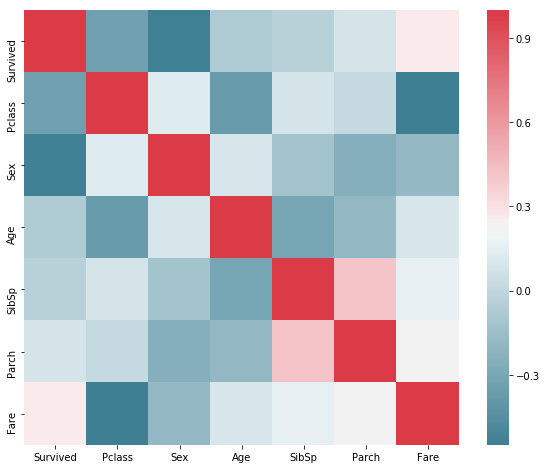

In [37]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = titanic_df_corr.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax) 

As it can be seen, "Pclass, Sex and Age" are the three columns that affect the most to "Survived".

We did not take into account the ticket because is like an ID: "A higher value does not mean that it is more important"

Now, as for Part I, we are gonna do some analysis to support future operations

In [38]:
array_Ages = titanic_df.Age.unique()
array_Ages

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [39]:
len(array_Ages)

89

In [40]:
titanic_df[['Survived']].count().values[0] - titanic_df[['Age']].count().values[0]

177

I wanted to check the different values of Age before starting to fill in the NaN values (which are 177) 

We are gonna calculate the age based on the values of Sex (two possible values, Class (three possible values) and Survived (two possible values); so we are going to have 2x2x3=12 different possibilities 

In [41]:
Survived_Sex_Class_Age = titanic_df.groupby(["Sex","Pclass","Survived"])[["Age"]].agg(["mean","median","min","max"])
Survived_Sex_Class_Age

Age                    
                             mean median    min   max
Sex    Pclass Survived                               
female 1      0         25.666667   25.0   2.00  50.0
              1         34.939024   35.0  14.00  63.0
       2      0         36.000000   32.5  24.00  57.0
              1         28.080882   28.0   2.00  55.0
       3      0         23.818182   22.0   2.00  48.0
              1         19.329787   19.0   0.75  63.0
male   1      0         44.581967   45.5  18.00  71.0
              1         36.248000   36.0   0.92  80.0
       2      0         33.369048   30.5  16.00  70.0
              1         16.022000    3.0   0.67  62.0
       3      0         27.255814   25.0   1.00  74.0
              1         22.274211   25.0   0.42  45.0

As it can be seen, the values of "mean" and "median" are very close, nevertheless we are going to choose the "median" to avoid the outliers problem of case "Sex = Male, Pclass = 2 and Survived = 1" where the median is 3 and the mean is 16 due to the extreme values

In [42]:
median_Age_per_SexClassSurvived = titanic_df.groupby(["Sex","Pclass","Survived"])[["Age"]].transform('median')
median_Age_per_SexClassSurvived.head(6)

,Age
PassengerId,
1,25.0
2,35.0
3,19.0
4,35.0
5,25.0
6,25.0


In [43]:
median_Age_per_SexClassSurvived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 1 columns):
Age    891 non-null float64
dtypes: float64(1)
memory usage: 53.9 KB


In [44]:
titanic_with_NaN = titanic_df.copy()
titanic_with_NaN.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


Three possible solutions:

1) Try assignment without a for loop:

In [45]:
titanic_with_NaN_merged = titanic_df.copy()

In [46]:
titanic_with_NaN_merged['Age_z'] = titanic_with_NaN_merged['Age'].where(titanic_with_NaN_merged['Age'].notnull(), median_Age_per_SexClassSurvived['Age'])
titanic_with_NaN_merged.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,25.0


In [47]:
titanic_with_NaN_merged = titanic_with_NaN_merged.drop(['Age'],axis=1)
titanic_with_NaN_merged.head(6)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0
6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,Q,25.0


In [48]:
titanic_with_NaN_merged = titanic_with_NaN_merged.rename(columns={'Age_z': 'Age'})
titanic_with_NaN_merged.head(6)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0
6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,Q,25.0


2) Try "for-if" method:

In [49]:
median_Age_per_SexClassSurvived.head(6)

,Age
PassengerId,
1,25.0
2,35.0
3,19.0
4,35.0
5,25.0
6,25.0


In [50]:
counter = 0

In [51]:
for i in range (1, len(median_Age_per_SexClassSurvived)+1):
    if math.isnan(titanic_with_NaN.at[i,"Age"]) == True:
        
        ##If the value in the titanic dataframe column Age is NaN, we go to the new DataFrame and 
        ##took the corresponding median Age, searching by ordered index, and put that value in the original titanic dataframe
        
        titanic_with_NaN.at[i,"Age"] = median_Age_per_SexClassSurvived.at[i,"Age"]
        counter = counter + 1

print(counter)

177


With "counter" we can confirm that we have changed the values of 177 positions, which were exactly the number of NaN values

In [52]:
titanic_with_NaN.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q


Let's check if there a NaN values in Sex column of my dataframe solution:

In [53]:
titanic_with_NaN[['Age']].isnull().any()

Age    False
dtype: bool

In [54]:
titanic_with_NaN.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q


Lastly, we are gonna compare the two dataframes, to confirm that both have the same values in Age and then we can choose the first or the second solution based on time efficiency

In [55]:
titanic_with_NaN["Age"].equals(titanic_with_NaN_merged["Age"])

True

For our titanic DataFrame length, both solutions work very similar in terms of time efficiency, but **we can do it better...**

3) "fillna" method solution

In [69]:
titanic_with_NaN_fillna = titanic_df.copy()
titanic_with_NaN_fillna.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


With "fillna" method, we can replace only the NaN values of our titanic DataFrame with their corresponding Ages of "median_Age_per_SexClassSurvived" DataFrame

In [70]:
titanic_with_NaN_fillna["Age"] = titanic_with_NaN_fillna["Age"].fillna(median_Age_per_SexClassSurvived["Age"])

As we have done above, we are gonna compare this "titanic_with_NaN_fillna" DataFrame with one of the two above solutions to confirm that it has the correct Age values

In [73]:
titanic_with_NaN["Age"].equals(titanic_with_NaN_fillna["Age"])

True

To sum up, we can end up choosing this **third option** as the **final solution** because it is better in terms of efficiency and easier to maintain

Final Solution: 

In [76]:
titanic_df_SolutionPart2 = titanic_with_NaN_fillna.copy()
titanic_df_SolutionPart2.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


--------------------------------------------------------------------------------------------

An extra analysis-attempt (that did not enter into my solution):

We can review that columns SibSp and Embarked has both less than 9 unique values, so we can try to see if the median improves quantitatively by adding these two columns to our analysis

In [24]:
titanic_df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [25]:
titanic_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [109]:
Five_Variable_for_Age = titanic_df.groupby(["Sex","Pclass","Survived","Embarked","SibSp"])[["Age"]].agg(["mean","median","min","max"])
Five_Variable_for_Age.dropna()

Age                    
                                            mean median    min   max
Sex    Pclass Survived Embarked SibSp                               
female 1      0        C        0      50.000000  50.00  50.00  50.0
                       S        1      13.500000  13.50   2.00  25.0
              1        C        0      35.000000  33.50  16.00  58.0
                                1      38.733333  39.00  17.00  60.0
                                2      19.500000  19.50  18.00  21.0
                       Q        1      33.000000  33.00  33.00  33.0
                       S        0      31.043478  30.00  15.00  58.0
                                1      37.375000  35.50  14.00  63.0
                                2      53.000000  53.00  53.00  53.0
                                3      23.500000  23.50  23.00  24.0
       2      0        S        0      39.666667  38.00  24.00  57.0
                                1      32.333333  27.00  26.00  44.0
              1        C        0      20.000000  20.00  17.00  23.0
                                1      18.800000  22.00   3.00  28.0
                       Q        0      30.000000  30.00  30.00  30.0
                       S        0      30.263889  31.00   6.00  55.0
                                1      28.700000  29.00   2.00  54.0
                                2      17.333333  24.00   4.00  24.0
                                3      30.000000  30.00  30.00  30.0
       3      0        C        0      26.666667  18.00  17.00  45.0
                                1      11.750000  11.75   9.00  14.5
                       Q        0      27.125000  25.75  18.00  39.0
                                1      32.000000  32.00  32.00  32.0
                       S        0      25.666667  24.50   2.00  45.0
                                1      32.666667  30.00  18.00  48.0
                                2      16.000000  18.00   9.00  21.0
                                3       5.500000   5.50   2.00   9.0
                                4       7.000000   7.50   2.00  11.0
                                5      16.000000  16.00  16.00  16.0
              1        C        0      14.333333  14.00   1.00  29.0
...                                          ...    ...    ...   ...
male   1      1        S        0      39.000000  36.00   4.00  80.0
                                1      30.102222  36.00   0.92  48.0
                                2      50.000000  50.00  50.00  50.0
       2      0        C        0      29.500000  29.50  23.00  36.0
                                1      29.500000  30.00  25.00  32.5
                       Q        0      57.000000  57.00  57.00  57.0
                       S        0      33.271930  30.00  16.00  70.0
                                1      36.200000  34.00  19.00  60.0
                                2      25.000000  23.50  21.00  32.0
              1        C        0       1.000000   1.00   1.00   1.0
                       S        0      31.471667  32.50   0.83  62.0
                                1       7.071429   3.00   0.67  32.0
                                2       1.000000   1.00   1.00   1.0
       3      0        C        0      29.357143  30.00  11.00  45.5
                                1      21.250000  21.50  15.00  27.0
                       Q        0      38.000000  31.50  19.00  70.5
                                1      40.000000  40.00  40.00  40.0
                                4       5.250000   5.50   2.00   8.0
                       S        0      29.119718  26.00  16.00  74.0
                                1      26.727273  26.00  16.00  40.0
                                2      28.666667  27.00  16.00  41.0
                                3       5.333333   4.00   2.00  10.0
                                4       7.571429   7.00   1.00  16.0
                                5       8.750000  10.00   1.00  14.0
              1        C        0      19.4

We saw that are people in our DataFrame with a unique combination of those columns (like the first row that appears, or the last one if we do not use head())
These means that by adding the other possible columns to our analysis, we are going too deep, too concrete, and the values does not change quantitatively neither; so are going to stay with our solution that uses columns "Class, Sex, Survived" 